In [1]:
import os
import pandas as pd
import numpy as np
import h5py

# Model-Related
import tensorflow as tf
from tensorflow.keras import layers

# Graphics and Plotting
import pydot, graphviz
import matplotlib.pyplot as plt 
import PIL
import seaborn as sns
sns.set()
sns.set_style(style = 'whitegrid')

# Data Preprocessing
from sklearn.model_selection import train_test_split

### Emotion Recognition in Visual Data

This module Extracts / Preprocesses & Explores data from the following datasets:
- CK+  
- Microsoft FER+

It will have a Convolutional Neural Network implemented with Keras + TensorFlow back-end and trained on this data.

We will be creating testing sets of the three team members capturing themselves.


# CK+ Dataset

In [2]:
def getCK():
    ck_data = h5py.File('../Datasets/CK_data.h5', 'r')
    
    X = np.array(ck_data.get('data_pixel'))
    y = np.array(ck_data.get('data_label'))
    
    return X, y

def splitTrainValidate(X, y, train_part):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_part)
    
    return X_train, y_train, X_test, y_test



### Image Classification with Convolutional Neural Network

- Using Keras with Tensorflow Back-end to Design, Train, Tune & Test a CNN

In [49]:
# Get CK+ Dataset
X_CK, y_CK = getCK()

In [50]:
X_train, y_train, X_test, y_test = splitTrainValidate(X_CK, y_CK, 0.75)
y_test_labels = y_test

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (735, 48, 48)
Training Labels (735,)
Validation Data:  (246, 48, 48)
Validation Labels:  (246,)


In [51]:
emotion_labels_ck = ['Anger','Disgust','Fear','Happy','Sadness','Surprise', 'Contempt']

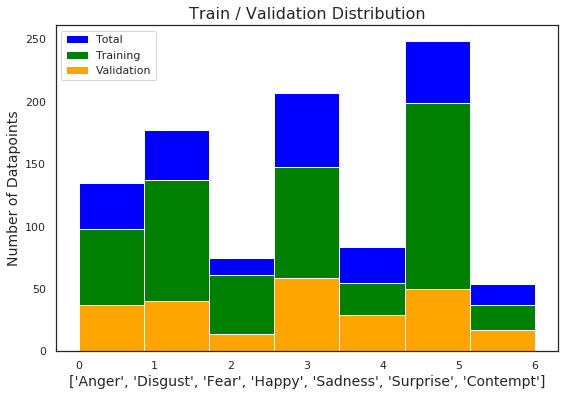

In [52]:
plt.figure(figsize = (9, 6) )
plt.xlabel(emotion_labels_ck, size = 14)
plt.ylabel('Number of Datapoints', size = 14)
plt.hist(y_CK, bins = 7, color = 'blue')
plt.hist(y_train, bins = 7, color = 'green');
plt.hist(y_test, bins = 7, color = 'orange');
plt.legend(['Total', 'Training', 'Validation'])
plt.title("Train / Validation Distribution", size = 16);

plt.show()

In [53]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

In [55]:
model_ck = tf.keras.models.Sequential([
    
        tf.keras.layers.InputLayer(input_shape = (48, 48, 1)),
    
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.25),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
    
        tf.keras.layers.Conv2D(32, kernel_size = (4, 4), padding = "same"),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, kernel_size = (4, 4), padding = "same"),     
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(128, kernel_size = (2, 2), padding = "same"),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size = (2, 2), padding = "same"),     
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
#         tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Conv2D(256, kernel_size = (1, 1), padding = "same"),     
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),     
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
#         tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(256, activation = 'relu'),    
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model_ck.compile(optimizer = tf.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy()])
model_ck_hist = model_ck.fit(X_train, y_train, batch_size = 16, epochs = 70)

Epoch 1/70
46/46 [==============================] - 6s 120ms/step - loss: 3.3876 - categorical_accuracy: 0.2068
Epoch 2/70
46/46 [==============================] - 5s 119ms/step - loss: 1.9469 - categorical_accuracy: 0.2082
Epoch 3/70
46/46 [==============================] - 5s 116ms/step - loss: 1.8944 - categorical_accuracy: 0.2435
Epoch 4/70
46/46 [==============================] - 5s 117ms/step - loss: 1.8425 - categorical_accuracy: 0.2422
Epoch 5/70
46/46 [==============================] - 5s 117ms/step - loss: 1.8337 - categorical_accuracy: 0.2558
Epoch 6/70
46/46 [==============================] - 5s 118ms/step - loss: 1.8158 - categorical_accuracy: 0.2776
Epoch 7/70
46/46 [==============================] - 6s 129ms/step - loss: 1.7771 - categorical_accuracy: 0.2871
Epoch 8/70
46/46 [==============================] - 7s 163ms/step - loss: 1.7743 - categorical_accuracy: 0.2789
Epoch 9/70
46/46 [==============================] - 7s 160ms/step - loss: 1.7806 - categorical_accuracy:

## Evaluation

In [56]:
model_ck.evaluate(X_test, y_test)

8/8 [==============================] - 0s 32ms/step - loss: 0.9944 - categorical_accuracy: 0.5976


[0.9943576455116272, 0.5975610017776489]

KeyError: 'val_categorical_accuracy'

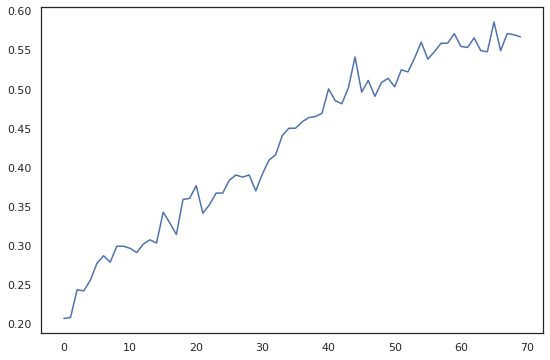

In [57]:
plt.figure(figsize = (9, 6))

plt.plot(model_ck_hist.history['categorical_accuracy'])
plt.plot(model_ck_hist.history['val_categorical_accuracy']);
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Accuracy Score', size = 14)
plt.title('Categorical Accuracy', size = 16)
plt.show()


KeyError: 'val_loss'

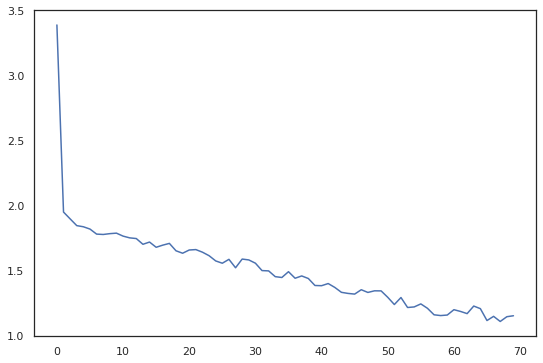

In [58]:
plt.figure(figsize = (9, 6))

plt.plot(model_ck_hist.history['loss'])
plt.plot(model_ck_hist.history['val_loss']);
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Loss', size = 14)
plt.title('Loss', size = 16)
plt.show()

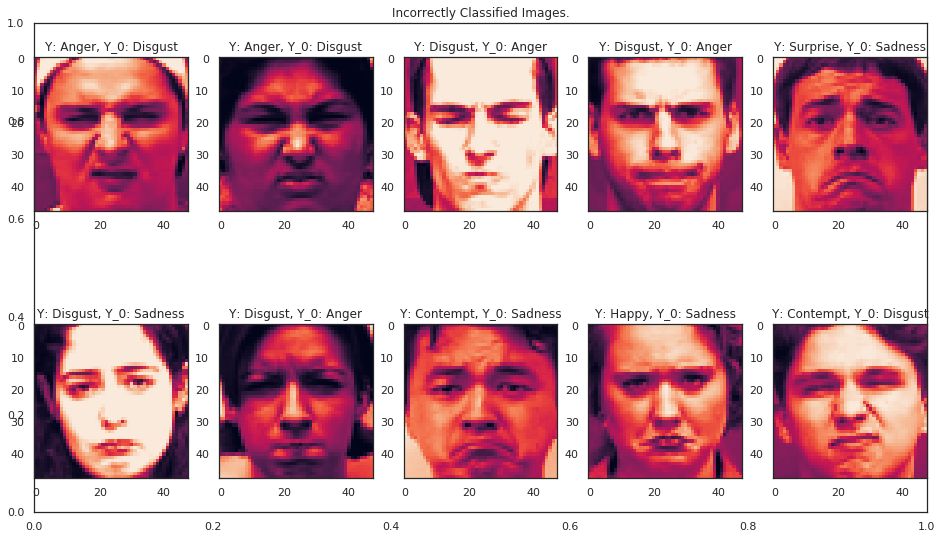

In [59]:
# Wrong Classified Image Examples.
sns.set_style(style = 'white')

pred = model_ck.predict_classes(X_test);

figure = plt.figure(figsize = (16, 9))

i = 0
imgcount = 1
plt.title('Incorrectly Classified Images.')

while imgcount < 11:
    
    if(y_test[i].argmax() != pred[i]):
        figure.add_subplot(2, 5, imgcount)
        plt.imshow(X_test[i].reshape((48, 48)))
        imgcount += 1
        plt.title('Y: '+ emotion_labels_ck[pred[i]] +  ', Y_0: ' + emotion_labels_ck[y_test[i].argmax()])
        
    i += 1
    
plt.show()

Plotting a confusion matrix reveals the performance of a CNN trained on CK+ Dataset.

It is evident that a model fails to classify the following Emotions completely:
- Fear
- Sadness
- Contempt

Confuses:
- Anger for Disgust

Does increasingly well:
- Disgust
- Happiness
- Surprise

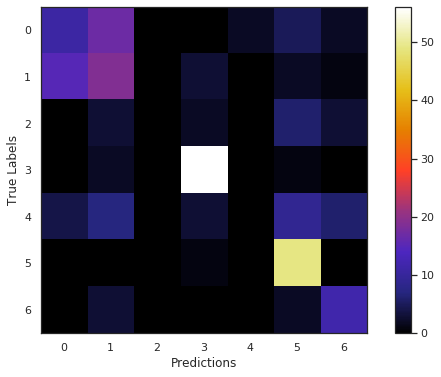

In [60]:
# Plotting a confusion matrix.
ck_conf = tf.math.confusion_matrix(y_test_labels, pred, num_classes = 7)

plt.figure(figsize = (10, 6))
plt.imshow(ck_conf, cmap = 'CMRmap')
plt.ylabel('True Labels')
plt.xlabel('Predictions')
plt.colorbar()

plt.show()

In [61]:
model_ck.save("ck_model_59.h5")

# FER+ Dataset

In [ ]:
from io import StringIO

def parsePixels(pixelString):
    data = pixelString.split(" ")
        
    return data


def loadFER():
    fer_data = getFER()
    
# Saves The data in PNG format Locally.

#     fer_training = fer_data[fer_data['Usage'] == 'Training']    
#     fer_validation_private = fer_data[fer_data['Usage'] == 'PrivateTest']
#     fer_validation_public = fer_data[fer_data['Usage'] == 'PublicTest']
    
#     # Save Training Images Locally
#     for idx, each in enumerate(fer_training['pixels']):
#         fer_training['pixels'].values[idx] =  np.asarray(fer_training['pixels'][idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_training['pixels'][idx])
#         img.save('../Datasets/FER2013/FER_TRAIN/' + 'fer_train_' + str(idx) + '.png')
        
#     # Save Training Labels
#     fer_training_y = fer_training['emotion']

#     # Save Validation Images (Private)
#     for idx, each in enumerate(fer_validation_private['pixels']):
#         fer_validation_private['pixels'].iloc[idx] = np.asarray(fer_validation_private['pixels'].iloc[idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_validation_private['pixels'].iloc[idx])
#         img.save('../Datasets/FER2013/FER_VAL_PRIVATE/' + 'fer_val_private_' + str(idx) + '.png')
        
#     # Save Validation Labels (Private)    
#     fer_validation_private_y = fer_validation_private['emotion']    
        
#     # Save Validation Images (Public)
#     for idx, each in enumerate(fer_validation_public['pixels']):
#         fer_validation_public['pixels'].iloc[idx] = np.asarray(fer_validation_public['pixels'].iloc[idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_validation_public['pixels'].iloc[idx])
#         img.save('../Datasets/FER2013/FER_VAL_PUBLIC/' + 'fer_val_public' + str(idx) + '.png')
        
#     # Save Validation Labels (Public)    
#     fer_validation_public_y = fer_validation_public['emotion']    
    
    # Prepare data
    pixels = fer_data['pixels'].tolist()
    parsed_pixels = []
    
    for pix_sequence in pixels:
        picture = parsePixels(pix_sequence)
        picture = np.asarray(picture, dtype = np.uint8).reshape(48, 48)
        parsed_pixels.append(picture)

    parsed_pixels = np.asarray(parsed_pixels)
    parsed_pixels = np.expand_dims(parsed_pixels, -1)
    
    emotion_labels = np.matrix(fer_data['emotion'])
    emotion_labels = emotion_labels.reshape(emotion_labels.shape[1], 1)
    
    return parsed_pixels, emotion_labels

def getFER():
    fer_data = pd.read_csv('../Datasets/fer2013.csv')
    
    return fer_data
    

In [ ]:
# Get FER+ Dataset
fer_pixels, fer_labels = loadFER()

In [ ]:
X_train, y_train, X_test, y_test = splitTrainValidate(fer_pixels, fer_labels, 0.9)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

In [ ]:
emotion_labels_fer = ['Fear', 'Disgust', 'Anger' ,'Happiness' , 'Sadness', 'Surprise','Neutral']

In [ ]:
plt.figure(figsize = (9, 6))
plt.hist(fer_labels, bins = 7, color = 'blue')
plt.hist(y_train, bins = 7, color = 'green')
plt.hist(y_test, bins = 7, color = 'orange')
plt.legend(['Total', 'Training', 'Validation'])

In [ ]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = tf.keras.models.Sequential([
    
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
    
        tf.keras.layers.Conv2D(32, kernel_size = (4, 4), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, kernel_size = (4, 4), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (1, 1), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (1, 1), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
        tf.keras.layers.Dropout(0.5),
    
#         tf.keras.layers.Conv2D(512, kernel_size = (2, 2), padding = "same"),    
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.Conv2D(512, kernel_size = (1, 1), padding = "same"),    
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.Conv2D(512, kernel_size = (2, 2), padding = "same"),    
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
#         tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2048, activation = 'relu'),
        tf.keras.layers.Dense(1024, activation = 'relu'),
    
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer = tf.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy()])
model_log = model.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = (X_test, y_test))


In [ ]:
plt.plot(model_log.history['categorical_accuracy'])
plt.plot(model_log.history['val_categorical_accuracy']);
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Accuracy Score', size = 14)
plt.title('Categorical Accuracy', size = 16)
plt.show()

In [ ]:
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss']);
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Loss', size = 14)
plt.title('Loss', size = 16)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
# y_fer_unchanged = []
# for idx, each in enumerate(y_test):
#     y_fer_unchanged.append(np.argmax(each))

fer_prediction = model.predict_classes(X_test)

In [ ]:
fer_prediction

In [ ]:
# Plotting a confusion matrix.
fer_conf = tf.math.confusion_matrix(y_fer_unchanged, fer_prediction, num_classes = 7)

plt.figure(figsize = (10, 6))
plt.imshow(fer_conf, cmap = 'CMRmap')
plt.ylabel('True Labels')
plt.xlabel('Predictions')
plt.colorbar()

plt.show()

In [ ]:
model.save("fer_model_53.h5")